<a href="https://colab.research.google.com/github/aneesh98/HeartDiseasePrediction/blob/master/DrivenDataMachineLearningWithHeart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!wget https://s3.amazonaws.com/drivendata/data/54/public/train_values.csv

--2019-09-28 16:43:41--  https://s3.amazonaws.com/drivendata/data/54/public/train_values.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.184.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.184.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9591 (9.4K) [text/csv]
Saving to: ‘train_values.csv.2’

train_values.csv.2  100%[===================>]   9.37K  --.-KB/s    in 0s      

2019-09-28 16:43:42 (131 MB/s) - ‘train_values.csv.2’ saved [9591/9591]



In [69]:
!wget https://s3.amazonaws.com/drivendata/data/54/public/train_labels.csv

--2019-09-28 16:43:47--  https://s3.amazonaws.com/drivendata/data/54/public/train_labels.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.228.131
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.228.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1653 (1.6K) [text/csv]
Saving to: ‘train_labels.csv.2’

train_labels.csv.2  100%[===================>]   1.61K  --.-KB/s    in 0s      

2019-09-28 16:43:47 (106 MB/s) - ‘train_labels.csv.2’ saved [1653/1653]



In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
def getCrossTab(feature_name, label, dataframe):
  data_ct = pd.crosstab(dataframe[feature_name], dataframe[label], margins = False)
  return data_ct

def drawBoxPlot(feature, label, df_, subplots = False, nrows = 0, ncolumns = 0):
  if not subplots:
    sns.boxplot(x=label, y = feature, data = df_)
  else:
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
    fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
    d = 0
    for row in range(nrows):
      for col in range(ncolumns):
        sns.boxplot(x=label, y=feature[d], data=df_, ax = ax[row, col])
        d += 1
        if d >= len(feature):
          return

def drawHist(feature, df_, subplots = False, nrows = 0, ncolumns = 0):
  if not subplots:
    plt.hist(df_[feature])
  else:
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
    fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
    d = 0
    for row in range(nrows):
      for col in range(ncolumns):
        ax[row, col].hist(df_[feature[d]])
        ax[row, col].set_xlabel(feature[d])
        d += 1
        if d >= len(feature):
          return

In [71]:
import pandas as pd
import patsy

df = pd.read_csv('train_values.csv')
df_l = pd.read_csv('train_labels.csv')
print(df_l.head())
df_labels = pd.DataFrame({'Target':df_l['heart_disease_present']})
df_ = pd.concat([df, df_labels] , axis = 1)

df_.head(10)
df_.loc[df['thal'] == 'normal', 'thal'] = 1
df_.loc[df['thal'] == 'fixed_defect', 'thal'] = 2
df_.loc[df['thal'] == 'reversible_defect', 'thal'] = 3
##Contingency Table
data_ct = pd.crosstab(df_['thal'], df_['Target'], margins = False)
print(data_ct)

  patient_id  heart_disease_present
0     0z64un                      0
1     ryoo3j                      0
2     yt1s1x                      1
3     l2xjde                      1
4     oyt4ek                      0
Target   0   1
thal          
1       78  20
2        4   4
3       18  56


In [0]:
df_
X = df_.iloc[:, 1:]

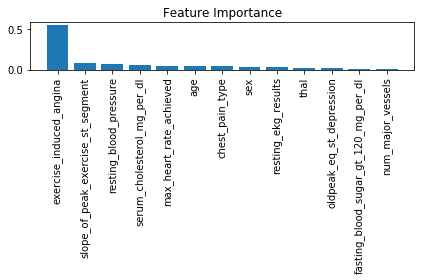

In [73]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
y = df_.loc[:, 'Target']
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X.iloc[:,1:X.shape[1]], y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importance")
plt.bar(range(X.iloc[:,1:X.shape[1]].shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.iloc[:,1:X.shape[1]].shape[1]), X.columns.values[indices], rotation = 90)
plt.xlim([-1, X.iloc[:,1:X.shape[1]].shape[1]])
plt.tight_layout()
plt.show()

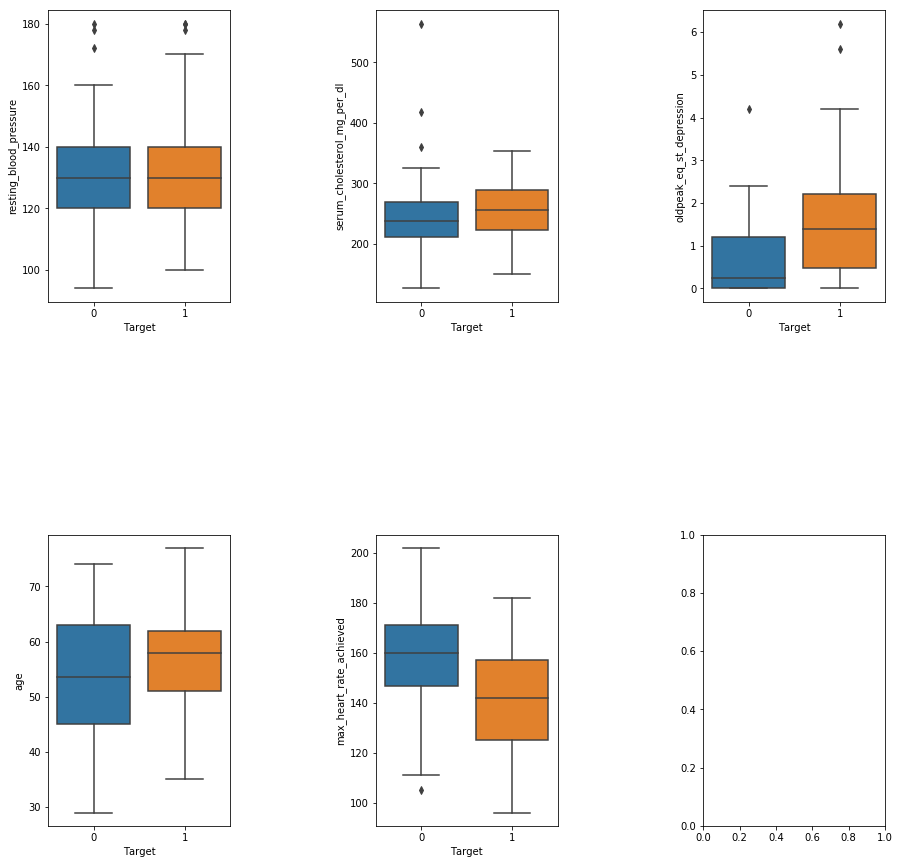

In [74]:
import seaborn as sns
%matplotlib inline 
label = 'Target'
numeric = ['resting_blood_pressure','serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']
drawBoxPlot(numeric, label, df_, subplots = True, nrows  = 2, ncolumns = 3)

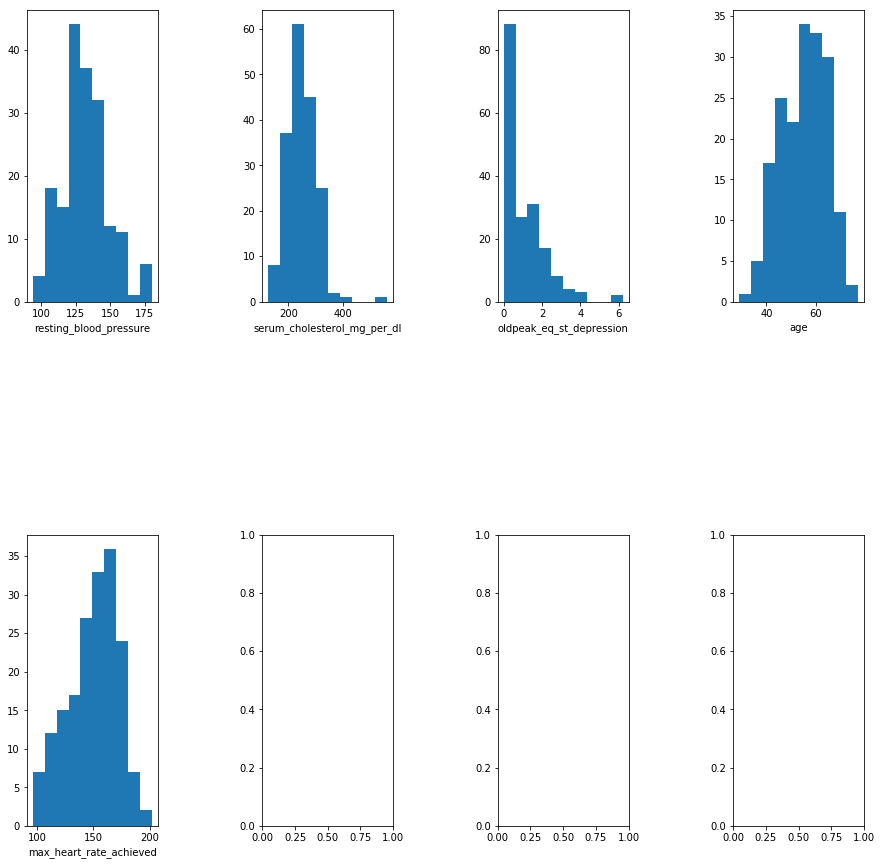

In [75]:
l = list(X.columns.values)
categorical = [e for e in l if e not in numeric]
drawHist(numeric, df_, subplots = True, nrows = 2, ncolumns=4)

In [76]:
for b in categorical:
  print(getCrossTab(b, 'Target', df_))

Target                              0   1
slope_of_peak_exercise_st_segment        
1                                  68  25
2                                  28  47
3                                   4   8
Target   0   1
thal          
1       78  20
2        4   4
3       18  56
Target            0   1
chest_pain_type        
1                 9   4
2                24   4
3                44  13
4                23  59
Target              0   1
num_major_vessels        
0                  77  29
1                  15  22
2                   6  17
3                   2  12
Target                                 0   1
fasting_blood_sugar_gt_120_mg_per_dl        
0                                     84  67
1                                     16  13
Target                0   1
resting_ekg_results        
0                    54  31
1                     0   1
2                    46  48
Target   0   1
sex           
0       45  11
1       55  69
Target                    0   1
exe

In [0]:
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
age = np.array(df_['oldpeak_eq_st_depression'])
sc = StandardScaler()
log_age = ss.boxcox(age)[0]
# print(max(log_age))
lis_age= [age, log_age]
# df_new = pd.DataFrame({'age':age, 'log_age':log_age}, index = None)
# col = ['age', 'log_age']
# drawHist(col, df_new, subplots=True, nrows = 1, ncolumns = 2)
fig, ax = plt.subplots(1,2,figsize = (7,7))
# fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
# print(log_age)
ax[0].hist(age)
ax[1].hist(log_age)

In [64]:
## Convert each feature into a normal distribution.


patient_id                              False
slope_of_peak_exercise_st_segment       False
thal                                    False
resting_blood_pressure                  False
chest_pain_type                         False
num_major_vessels                       False
fasting_blood_sugar_gt_120_mg_per_dl    False
resting_ekg_results                     False
serum_cholesterol_mg_per_dl             False
oldpeak_eq_st_depression                False
sex                                     False
age                                     False
max_heart_rate_achieved                 False
exercise_induced_angina                 False
Target                                  False
dtype: bool

In [0]:
print(indices)
l = X.columns.values
type(l)

[13  1  3  8  4 11 12 10  7  2  0  9  6  5]


numpy.ndarray

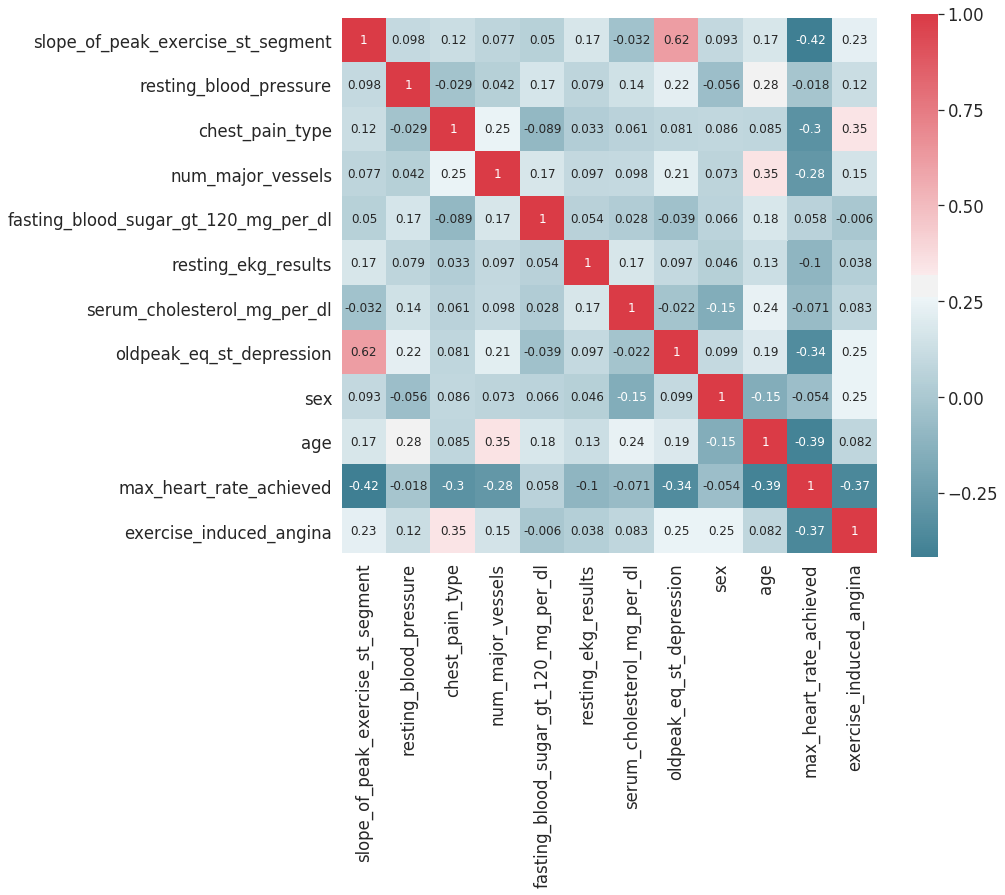

In [0]:
import seaborn as sns
sns.set(font_scale = 1.5)
cmap_, ax = plt.subplots(figsize = (12,10))
corr = df.corr(method = 'pearson')
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap = cmap, square = True, 
            ax=ax, annot=True,
           annot_kws = {'fontsize': 12})

In [0]:
arr = X.columns.values[indices]
selected_columns = arr[:-2]
selected_columns = np.concatenate([selected_columns, np.array(['Target'])])
print(selected_columns)
X.shape

['Target' 'thal' 'chest_pain_type' 'oldpeak_eq_st_depression'
 'num_major_vessels' 'max_heart_rate_achieved' 'exercise_induced_angina'
 'age' 'serum_cholesterol_mg_per_dl' 'resting_blood_pressure'
 'slope_of_peak_exercise_st_segment' 'sex' 'Target']


(180, 14)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_final = X[selected_columns]
X_final_std = sc.fit_transform(X_final)
from sklearn.model_selection import train_test_split
y_train, X_train = patsy.dmatrices(formula, data = X.loc[0:154, selected_columns])
y_test, X_test = patsy.dmatrices(formula, data = X.loc[154:180, selected_columns])

In [0]:
print(X_train.shape)

(155, 15)


In [0]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
r = np.ones

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
param_range = [0.0001, 0.001, 0.01, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.0, 10.0, 100.0, 1000.0]
lr = LogisticRegression()
paramgrid = [{'C': param_range}]
gs = GridSearchCV(estimator = lr, param_grid = paramgrid,
                 scoring = 'neg_log_loss', cv =  10)
gs.fit(X_train, y_train)
print(gs.best_params_)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (15,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy'
             , metrics = ['accuracy'])
model.summary()

In [0]:
y_train

In [0]:
model.fit(X_train_std, y_train, epochs = 100, batch_size = 4)

ValueError: ignored

In [0]:
print(gs.best_score_, gs.best_params_)

In [0]:
lr = LogisticRegression(C = 0.1)
res = lr.fit(X_train_std, y_train)

In [0]:
lr.classes_

In [0]:
preds = model.predict_proba(X_test)
print(preds.shape)

In [0]:
!wget https://s3.amazonaws.com/drivendata/data/54/public/test_values.csv

In [0]:
import pandas as pd
test_vals = pd.read_csv('test_values.csv')
Ids = test_vals['patient_id']
tvn= test_vals[selected_columns[:-1]]
tvn.loc[df['thal'] == 'normal', 'thal'] = 1
tvn.loc[df['thal'] == 'fixed_defect', 'thal'] = 2
tvn.loc[df['thal'] == 'reversible_defect', 'thal'] = 3


In [0]:
new_test = patsy.build_design_matrices([X_train.design_info], tvn)
# print(new_test[2])

In [0]:
res.summary()

In [0]:
new_test_std = sc.transform(new_test[0])
preds = model.predict(new_test_std)
print(new_test_std.shape)
sub_df = pd.DataFrame({'patient_id':Ids, 'heart_disease_present':preds.flatten()})
sub_df.to_csv('Submissions_new_3.csv', index=False)